In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential

import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
train_Path = 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test'
test_Path = 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\train'

In [3]:
IMAGE_SIZE = [224, 224]

In [4]:
resnet = ResNet50(
    input_shape = IMAGE_SIZE +[3], 
    weights = 'imagenet', # Default weights.
    include_top = False   # 
)

In [5]:
for layer in resnet.layers:
    layer.trainable = False

In [6]:
folders = glob(train_Path + '/*')
folders

['C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final AD JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final CN JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final EMCI JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final LMCI JPEG',
 'C:\\Users\\eesha\\Desktop\\Alz Detection\\Dataset-3\\archive (1)\\Alzheimers-ADNI\\test\\Final MCI JPEG']

In [7]:
alz_label = ['AD', 'CN', 'EMCI', 'LMCI', 'MCI']

In [8]:
# Set the flatten layer.
x = Flatten() (resnet.output)

In [9]:
prediction = Dense(len(folders), activation = 'softmax')(x)

In [10]:
model = Model(inputs = resnet.input, outputs = prediction)

In [11]:
model.compile (
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [12]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [13]:
training_set = train_datagen.flow_from_directory(
    train_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical' # As we have more than 2 so using categorical
)

Found 195 images belonging to 5 classes.


In [14]:
test_set = train_datagen.flow_from_directory(
    test_Path,
    target_size = IMAGE_SIZE,
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1101 images belonging to 5 classes.


In [15]:
history = model.fit(
    training_set,
    epochs = 50,
    batch_size = 32
)

Epoch 1/50
7/7 [==============================] - 13s 1s/step - loss: 7.2356 - accuracy: 0.3282
Epoch 2/50
7/7 [==============================] - 10s 1s/step - loss: 4.2020 - accuracy: 0.2667
Epoch 3/50
7/7 [==============================] - 10s 2s/step - loss: 5.8651 - accuracy: 0.2821
Epoch 4/50
7/7 [==============================] - 10s 1s/step - loss: 3.6062 - accuracy: 0.3385
Epoch 5/50
7/7 [==============================] - 10s 1s/step - loss: 2.8520 - accuracy: 0.2205
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 2.7595 - accuracy: 0.3282
Epoch 7/50
7/7 [==============================] - 10s 2s/step - loss: 2.5994 - accuracy: 0.3487
Epoch 8/50
7/7 [==============================] - 10s 1s/step - loss: 2.0163 - accuracy: 0.4513
Epoch 9/50
7/7 [==============================] - 11s 1s/step - loss: 1.8106 - accuracy: 0.3487
Epoch 10/50
7/7 [==============================] - 11s 1s/step - loss: 1.6404 - accuracy: 0.3795
Epoch 11/50
7/7 [======================

In [16]:
history.history

{'loss': [7.235601425170898,
  4.201981067657471,
  5.865118503570557,
  3.6061694622039795,
  2.851951837539673,
  2.759453535079956,
  2.5994155406951904,
  2.0163121223449707,
  1.8105932474136353,
  1.6403553485870361,
  1.7217193841934204,
  1.751402497291565,
  2.0120041370391846,
  2.457362651824951,
  2.597109079360962,
  2.6413726806640625,
  2.043585777282715,
  1.6565815210342407,
  1.9382812976837158,
  2.55076003074646,
  1.986937165260315,
  1.9192501306533813,
  1.7470003366470337,
  1.5975576639175415,
  1.7229770421981812,
  1.9466136693954468,
  1.8932088613510132,
  1.5438019037246704,
  1.6054067611694336,
  2.139359474182129,
  1.698106050491333,
  2.010225534439087,
  1.7155863046646118,
  1.9295177459716797,
  1.8770663738250732,
  3.354731559753418,
  2.3180606365203857,
  3.1848056316375732,
  2.863276481628418,
  1.7727011442184448,
  1.5986093282699585,
  2.348768711090088,
  2.5200235843658447,
  1.968315839767456,
  1.7642370462417603,
  2.023371696472168,


In [17]:
results = model.evaluate(test_set)

35/35 [==============================] - 62s 2s/step - loss: 3.5927 - accuracy: 0.2825


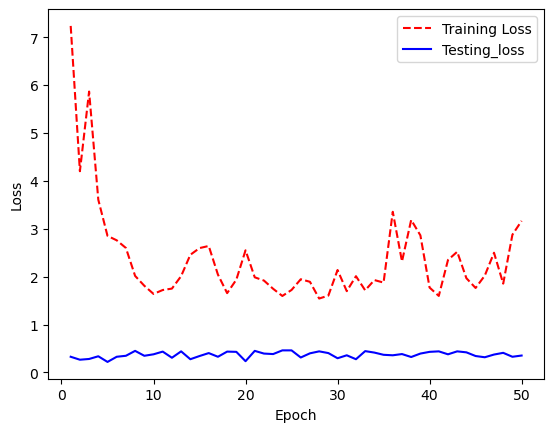

In [18]:
# Get training and test loss histories
training_loss = history.history['loss']
testing_loss = history.history['accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, testing_loss, 'b-')
plt.legend(['Training Loss', 'Testing_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

In [19]:
y_pred = model.predict(test_set)

35/35 [==============================] - 60s 2s/step


In [22]:
from tqdm import tqdm

img, label = next(test_set)
X_test = list(img)
y_test = list(label)

for i in tqdm(range(int(len(test_set))-1)): #1st batch is already fetched before the for loop.
  img, label = next(test_set)
  X_test += list(img)
  y_test +=  list(label)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_test.shape, y_test.shape)

100%|██████████| 34/34 [00:11<00:00,  2.92it/s]


(1101, 224, 224, 3) (1101, 5)


In [23]:
# Calculating ROC-AUC
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other

n_classes = 5 # number of class

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i], )
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

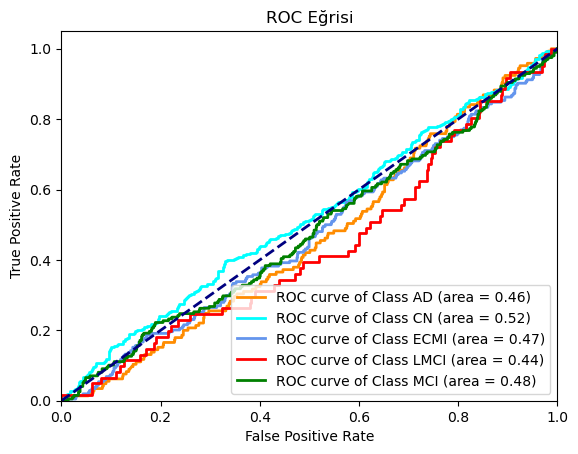

In [34]:
# classes = ['AD', 'CN', 'EMCI', 'LMCI', 'MCI']


plt.figure()
lw = 2 # line_width
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve of Class AD (area = %0.2f)' % roc_auc[0]) # Drawing Curve according to 3. class 
plt.plot(fpr[1], tpr[1], color='aqua',
         lw=lw, label='ROC curve of Class CN (area = %0.2f)' % roc_auc[1]) # Drawing Curve according to 3. class 
plt.plot(fpr[2], tpr[2], color='cornflowerblue',
         lw=lw, label='ROC curve of Class ECMI (area = %0.2f)' % roc_auc[2]) # Drawing Curve according to 3. class 
plt.plot(fpr[3], tpr[3], color='red',
         lw=lw, label='ROC curve of Class LMCI (area = %0.2f)' % roc_auc[3]) # Drawing Curve according to 3. class 
plt.plot(fpr[4], tpr[4], color='green',
         lw=lw, label='ROC curve of Class MCI (area = %0.2f)' % roc_auc[4]) # Drawing Curve according to 3. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

C:\Users\eesha\AppData\Local\Temp\ipykernel_10908\616230313.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


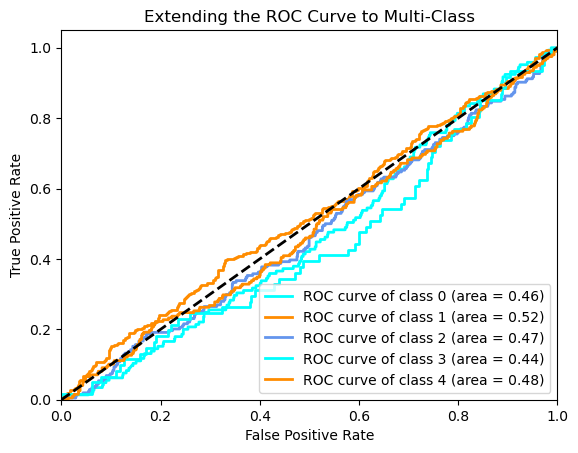

In [26]:
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)



colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()

C:\Users\eesha\AppData\Local\Temp\ipykernel_10908\2060348115.py:9: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


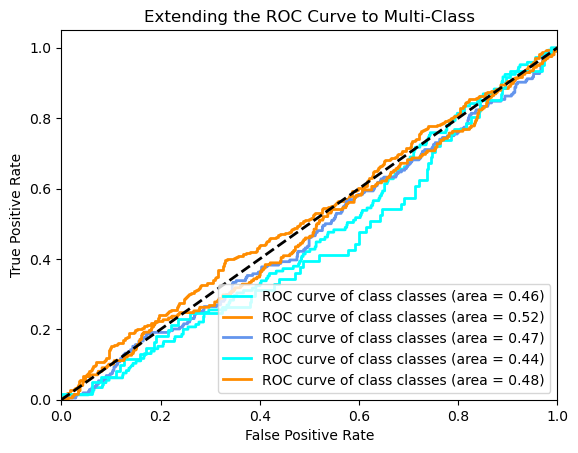

In [31]:
from itertools import cycle
roc_auc_scores = []
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

classes = ['AD', 'CN', 'EMCI', 'LMCI', 'MCI']
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class classes (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
    roc_auc_scores.append(roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()